# Point Neuron Models

## LIF Neuron

In [5]:
import jaxsnn.base.explicit as explicit
import jaxsnn.base.funcutils as funcutils
import jaxsnn.functional.threshold as threshold
import jaxsnn.functional.leaky_integrate_and_fire as lif

import jax
import numpy as np

### Leak over Threshold

In [6]:
p = lif.LIFParameters(v_leak=0.6, v_th=0.5)
initial_state = lif.LIFState(v=p.v_reset, I=0.0, w_rec=0.0)

T = 1000
dt = 0.0001
step_fn = explicit.classic_rk4_cde(lif.lif_equation(p, threshold.triangular), dt)

stim = lif.LIFInput(I=np.zeros(T), z=np.zeros(T))
integrator = funcutils.controlled_trajectory(step_fn, stim)
integrator = jax.jit(integrator)

In [7]:
_, (spikes, state) = integrator(initial_state)

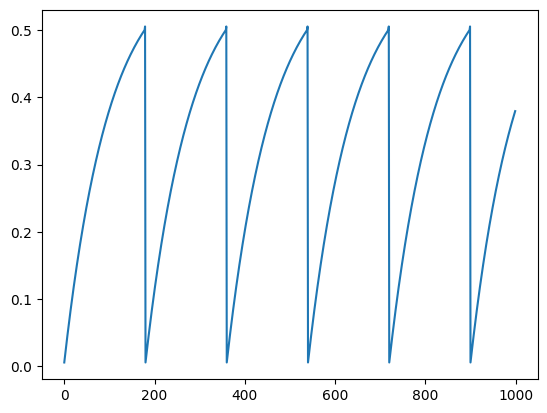

In [8]:
import matplotlib.pyplot as plt

# plt.plot(state.I)
plt.plot(state.v)